## Enabling GPU Computing

In [1]:
import tensorflow as tf
physical_devices=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

## Importing required libraries from Keras API

In [2]:
from keras import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
import numpy as np
import glob
import random
import itertools
import os
import shutil
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

## Segregating data into train, valid and test folder having cats and dogs photos.

In [5]:
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('test/dog')
    os.makedirs('valid/dog')
    
    os.makedirs('train/cat')
    os.makedirs('test/cat')
    os.makedirs('valid/cat')
    
    # train
    for c in random.sample(glob.glob('cat*'),7500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('dog*'),7500):
        shutil.move(c,'train/dog')
    # valid
    for c in random.sample(glob.glob('cat*'),2500):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*'),2500):
        shutil.move(c,'valid/dog')
    # test
    for c in random.sample(glob.glob('cat*'),2500):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),2500):
        shutil.move(c,'test/dog')

In [6]:
os.chdir('../../')

In [43]:
train_path='data/dogs-vs-cats/train'
test_path='data/dogs-vs-cats/test'
valid_path='data/dogs-vs-cats/valid'

## Using VGG16 preprocessing technique, preprocessing the image data

In [44]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
imgs,labels=next(train_batches)

In [47]:
def plotImages(imgs):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axxes=axes.flatten()
    for img,ax in zip(imgs,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## After preprocessing is completed...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

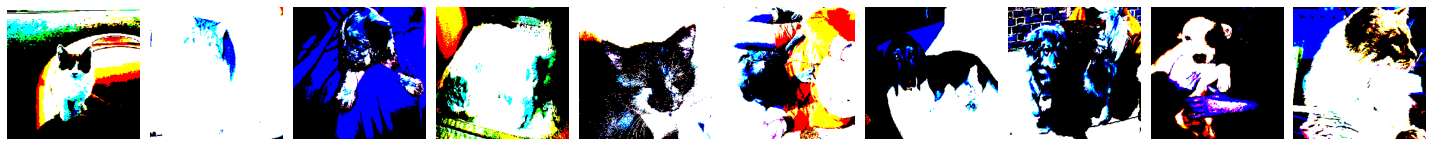

In [9]:
plotImages(imgs)

## Creating a Sequential Model

In [68]:
model=Sequential()

## Adding Convolutional layers and MaxPool layers to the model

In [69]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2),strides=2))

model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

## Summary of the model a.k.a The Architecture

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_27 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_28 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 56, 56, 128)      

## Compiling the model 

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

## Training on train batch and validating it on valid batch

In [72]:
history=model.fit(x=train_batches,validation_data=valid_batches,epochs=4)

Epoch 1/4
1500/1500 [==============================] - 70s 46ms/step - loss: 0.6833 - accuracy: 0.6005 - val_loss: 0.5410 - val_accuracy: 0.7310
Epoch 2/4
1500/1500 [==============================] - 69s 46ms/step - loss: 0.5141 - accuracy: 0.7516 - val_loss: 0.5760 - val_accuracy: 0.6998
Epoch 3/4
1500/1500 [==============================] - 71s 48ms/step - loss: 0.4419 - accuracy: 0.7988 - val_loss: 0.4130 - val_accuracy: 0.8086
Epoch 4/4
1500/1500 [==============================] - 72s 48ms/step - loss: 0.3761 - accuracy: 0.8368 - val_loss: 0.3720 - val_accuracy: 0.8334


## Let's visualize the accuracy of trainning and accuracy of cross validation

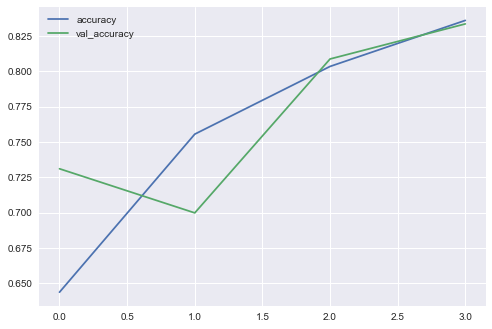

In [73]:
import pandas as pd
history=pd.DataFrame(history.history)
ax=history.accuracy.plot()
history.val_accuracy.plot(ax=ax)
ax.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

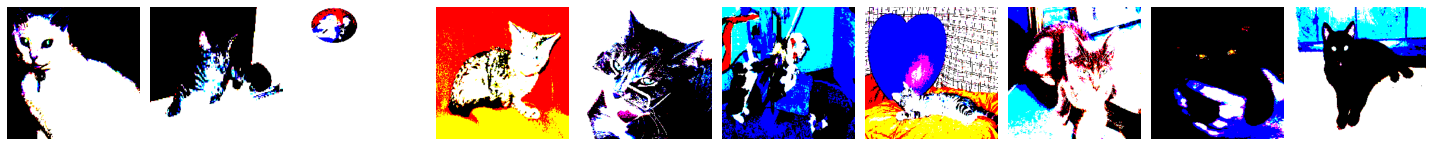

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [48]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

## Making predictions on the trained model

In [63]:
predictions=model.predict(test_batches)

In [64]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else "black"
                )
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

## Plotting the confusion matrix

In [65]:
cm=confusion_matrix(test_batches.classes,np.argmax(predictions,axis=-1))

Confusion matrix without normalization
[[2043  457]
 [ 619 1881]]


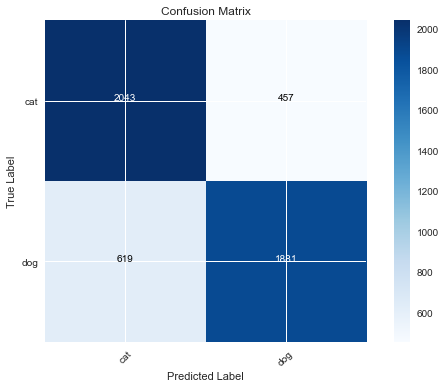

In [66]:
plot_confusion_matrix(cm,classes=['cat','dog'])

## Evaluating the model on test batch

In [49]:
model.evaluate(test_imgs,test_labels)

1/1 [==============================] - 1s 944ms/step - loss: 0.3285 - accuracy: 0.8000


[0.32845574617385864, 0.800000011920929]

In [5]:
from tensorflow.keras.models import load_model

## Saving the model in h5 format

In [6]:
model=load_model('final_model_cats-vs-dogs.h5')

## Let's try taking random picture from the dataset and check whether it's predicting or not

In [51]:
from keras.preprocessing.image import load_img,img_to_array,array_to_img

In [52]:
img=load_img('dog.13.jpg',target_size=(224,224,3))

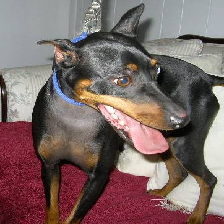

In [53]:
img

## Converting the image into array format

In [26]:
img=img_to_array(img)

## Reshape it

In [34]:
img=img.reshape(-1,224,224,3)

## Let's try to make a prediction...
### Note: 0 for cats and 1 for dogs

In [37]:
predict=model.predict(img)

## Here we get the probabilities of the image being a cat or a dog
### The output says that 0.62 (or 62%) is dogs and 0.38 (or 38%) is a cat. From this we can say that the image is a dog as the P(dog) > P(cat)


In [54]:
predict

array([[0.3842353, 0.6157647]], dtype=float32)

## Simplying the output and showing the result in 0 or 1

In [38]:
np.argmax(predict,axis=-1)

array([1], dtype=int64)

## Let's try the same for a randomly picked cat image from the dataset

In [55]:
img2=load_img('cat.10.jpg',target_size=(224,224,3))


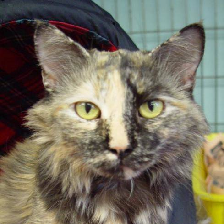

In [56]:
img2

In [57]:
img2=img_to_array(img2)
img2=img2.reshape(-1,224,224,3)

In [58]:
predict1=model.predict(img2)

## Again the probabilities are printed. As you can see P(cat) > P(dog)

In [59]:
predict1

array([[0.79147214, 0.20852791]], dtype=float32)

In [60]:
np.argmax(predict1,axis=-1)

array([0], dtype=int64)